In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df= pd.read_csv('dataset_train+test2 copy.csv', sep=",")

In [5]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [6]:
del df['date']

In [7]:
df = df[['Temperature', 'Light', 'CO2', 'Occupancy', ]]

In [8]:
df.head()

,Temperature,Light,CO2,Occupancy
0,23.18,426.0,721.25,1
1,23.15,429.5,714.00,1
2,23.15,426.0,713.50,1
3,23.15,426.0,708.25,1
4,23.10,426.0,704.50,1


# Regression starts

In [9]:
df.head()

,Temperature,Light,CO2,Occupancy
0,23.18,426.0,721.25,1
1,23.15,429.5,714.00,1
2,23.15,426.0,713.50,1
3,23.15,426.0,708.25,1
4,23.10,426.0,704.50,1


In [11]:
y_name = 'Occupancy'

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.07877769  0.00197698  0.00019816]
Intercept: 
 1.4747244236942192


In [17]:
y_pred = reg.predict(X_test)

In [18]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.874
MSE: 0.022
MAE: 0.091


In [19]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.271
MSE: 0.125
MAE: 0.267


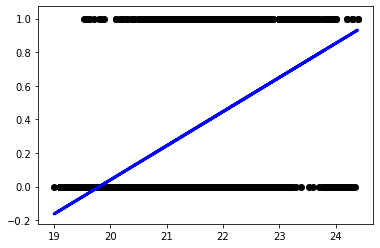

In [20]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

In [21]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.00170763  0.00015332]
Intercept: 
 -0.10240437438313138


In [22]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.852
MSE: 0.026
MAE: 0.094


In [23]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.07876661  0.00197695  0.00019816]
Intercept: 
 1.47450178595182


In [24]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.874
MSE: 0.022
MAE: 0.091
